In [1]:
# importing multiple libraries for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# spliting name data in 3 partisions
model =mpg.name.str.partition(' ').rename(columns = {0:'brand', 2: 'model'})

In [5]:
# inserting model data as column in mpg data
mpg = pd.merge(left=mpg, right =model, left_index=True, right_index=True , how= 'inner')

In [6]:
# droping extra column
mpg.drop(columns=1,inplace=True)

In [7]:
#copying the data
mpg_org = mpg.copy(deep=True)

In [8]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger


In [9]:
mpg.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

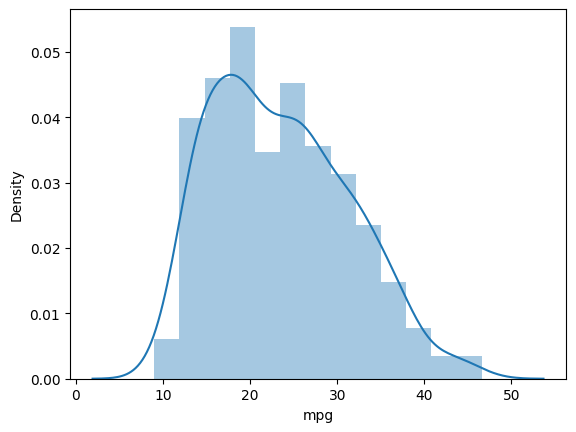

In [10]:
sns.distplot(mpg.mpg)
plt.show()

observation:
- most of vehicle mpg lies between 15 to 30
- median lies as 23 and mean of mpg is 23.5

In [11]:
cat_cols = mpg.describe(include = 'object').columns.to_list()

In [12]:
cat_cols.append('cylinders')
cat_cols.append('horsepower')
cat_cols.append('model_year')

In [13]:
cat_cols.remove('name')
cat_cols.remove('model')

In [14]:
cat_cols                # all the category colums of the dataset

['origin', 'brand', 'cylinders', 'horsepower', 'model_year']

<Figure size 640x480 with 0 Axes>

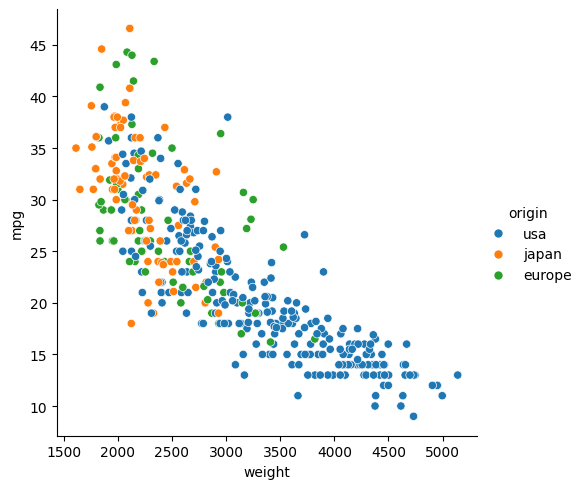

In [15]:
plt.figure(dpi= 100)
sns.relplot(y='mpg',x = 'weight',hue='origin',data = mpg)
plt.show()

Observations
- mpg and weight are highly negatively corelated, corelation coefficient(r) is euqal to -0.83
- japanese car are lightest as well as has the highest mpg
- usa cars are comperatively heavy and have lower milege

In [16]:
mpg[['weight','mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


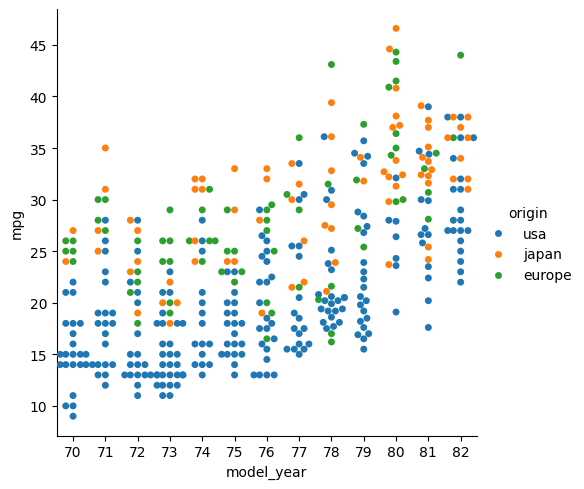

In [17]:
sns.catplot(x = 'model_year', y = 'mpg',kind = 'swarm',hue = 'origin', data=mpg)
plt.show()

Observations
- year on year, mpg of usa vehicle are low, while almost every year, japanese car has highest mpg

In [18]:
mpg.groupby('origin')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


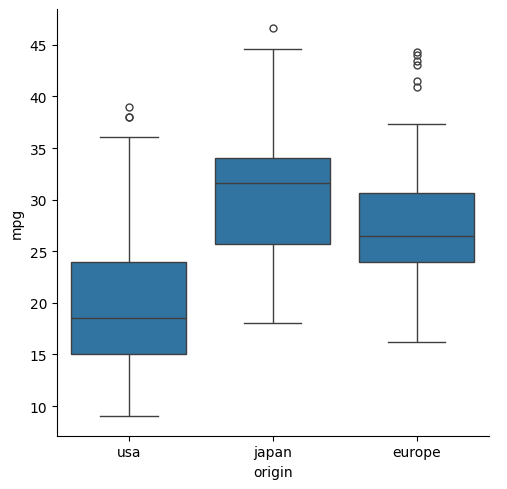

In [19]:
sns.catplot(x='origin', y = 'mpg',data = mpg, kind = 'box')
plt.show()

observation
- through this box plot, we can clearly see japanese cars provide better milage while usa has loweset,
- we can see europe has multiple outliers

In [20]:
mpg.groupby('cylinders')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


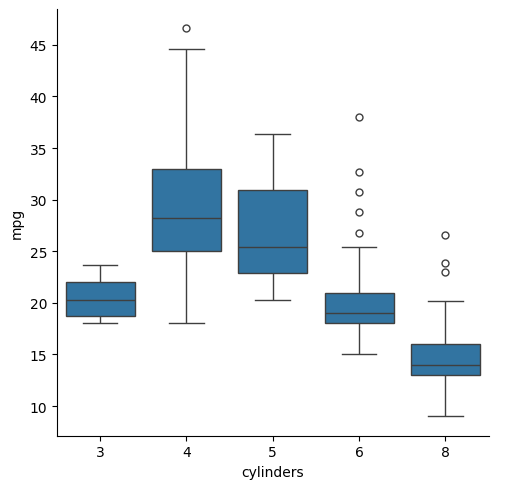

In [21]:
sns.catplot(x = 'cylinders', y= 'mpg', data = mpg, kind = 'box')
plt.show()

In [22]:
mpg[['cylinders','mpg']].corr()

,cylinders,mpg
cylinders,1.000000,-0.775396
mpg,-0.775396,1.000000


observation:
- lower the cylinders, higher the milage, however there is one exception wth 3 cylinders
- that means, cylender and mpg are highley negatively corelated, with corelation factor of -0.77

In [23]:
mpg[['mpg','displacement']].corr()

,mpg,displacement
mpg,1.000000,-0.804203
displacement,-0.804203,1.000000


In [24]:
mpg[['cylinders','displacement']].corr()

,cylinders,displacement
cylinders,1.000000,0.950721
displacement,0.950721,1.000000


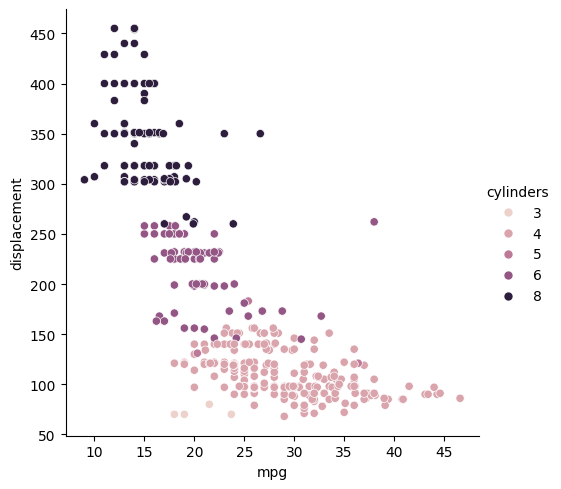

In [25]:
sns.relplot(data= mpg, x= 'mpg',y='displacement',hue='cylinders')
plt.show()

observation:
- mpg and displacement are negatively corelated with corelation factor of -0.8, while cylenders and displacements are hightly positively corelated, with corelation fator of 0.95

In [26]:

mpg[['horsepower','mpg','cylinders','acceleration','weight']].corr()

,horsepower,mpg,cylinders,acceleration,weight
horsepower,1.000000,-0.778427,0.842983,-0.689196,0.864538
mpg,-0.778427,1.000000,-0.775396,0.420289,-0.831741
cylinders,0.842983,-0.775396,1.000000,-0.505419,0.896017
acceleration,-0.689196,0.420289,-0.505419,1.000000,-0.417457
weight,0.864538,-0.831741,0.896017,-0.417457,1.000000


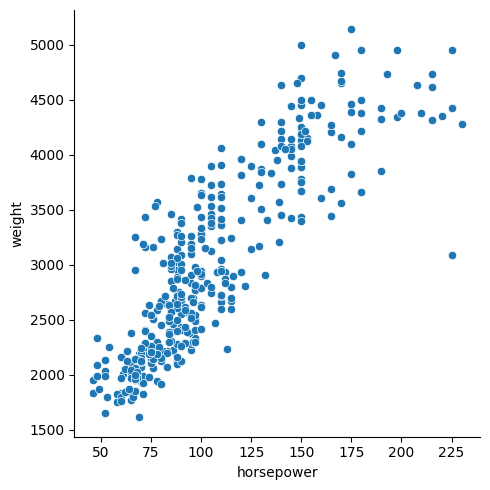

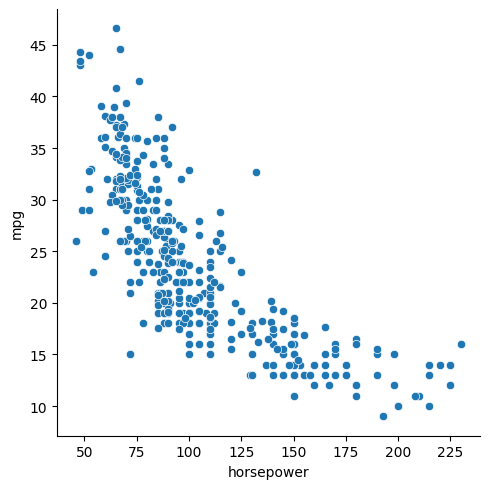

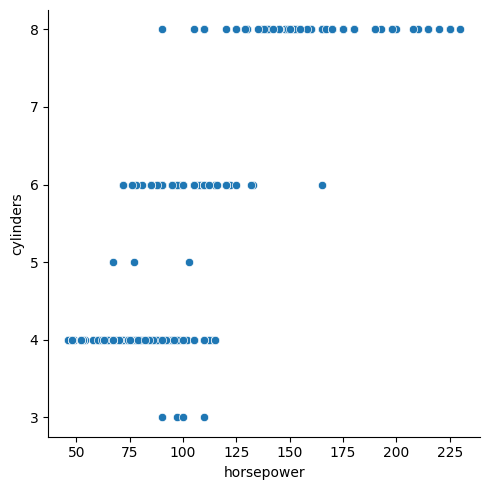

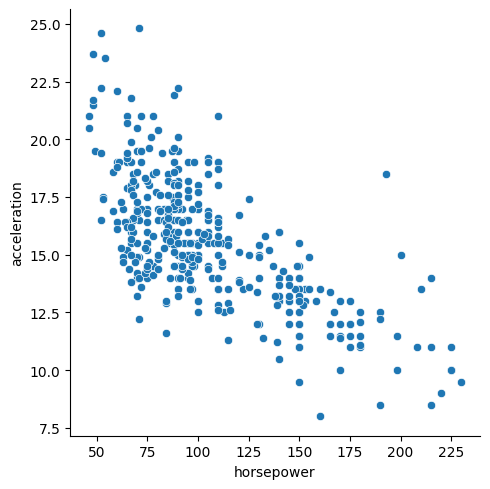

In [27]:
list1 = ['weight','mpg','cylinders','acceleration']
for i in list1:
    sns.relplot(data=mpg,x='horsepower', y=i)
    plt.show()

observation:
- hose

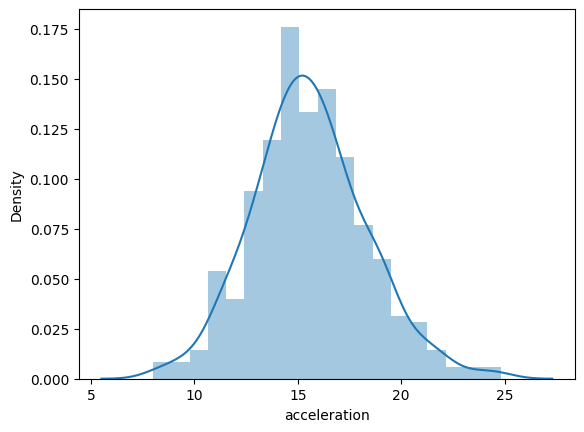

In [28]:
sns.distplot(mpg.acceleration)
plt.show()

observation:
- average acceleration lie between 12 to 18

In [29]:
brand_perf = mpg.brand.value_counts().head(20).to_dict()
brand=[]
data= []

In [30]:
for i,j in brand_perf.items():
    brand.append(i)
    data.append(j)

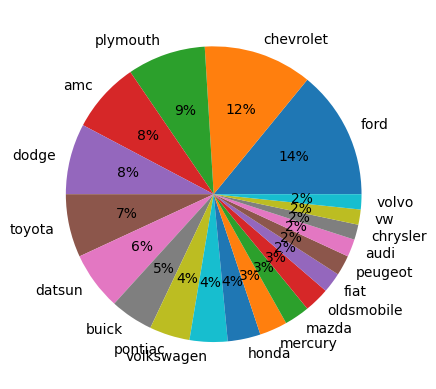

In [31]:
plt.pie(data,labels=brand,autopct='%.0f%%')
plt.show()

Observation:
- ford has the highest market share with 14%
- after ford chevrolet has 12 % market share and soo onn

In [32]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [35]:
mpg.drop(['name','brand','model'],axis = 1,inplace =True)

In [36]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [39]:
new_mpg = pd.get_dummies(mpg,drop_first = True)
new_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


In [49]:
new_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin_japan    0
origin_usa      0
dtype: int64

In [50]:
new_mpg = new_mpg.dropna()

In [52]:
new_mpg = new_mpg.reset_index(drop=True)

In [53]:
X = new_mpg.drop('mpg',axis =1)
y = new_mpg['mpg']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [71]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 2.64058575566127
Mean Squared Error = 11.882268558597124
Root Mean Squared Error = 3.447066660016473


In [72]:
# Evaluating the model for both train and test data
y_pred_train = lr.predict(X_train)      # ----- i am going to predict y_train
y_pred_test = lr.predict(X_test)        # ------ i am going to predict y_test

In [73]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 0.8209648350590668
Testing Accuracy = 0.8285937887753858


In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for i in range(3):
    models[i].fit(X_train,y_train)

    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train)
    y_pred_test=models[i].predict(X_test)

    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))

    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))

    print()
    print('--'*55)

LinearRegression(): 
MSE_train:  10.490330742374384
MSE_test:  11.882268558597124
RMSE_train:  3.238878006713804
RMSE_test:  3.447066660016473
R2_score_train:  0.8209648350590668
R2_score_test:  0.8285937887753858

--------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(): 
MSE_train:  0.0
MSE_test:  11.014050632911392
RMSE_train:  0.0
RMSE_test:  3.31874232698343
R2_score_train:  1.0
R2_score_test:  0.8411181602306507

--------------------------------------------------------------------------------------------------------------
RandomForestRegressor(): 
MSE_train:  0.9210185047923332
MSE_test:  10.197735443037962
RMSE_train:  0.9596970901239271
RMSE_test:  3.1933893347097473
R2_score_train:  0.9842812677723234
R2_score_test:  0.8528938151210689

--------------------------------------------------------------------------------------------------------------
